# Project Correction

# Project 3 Days Workshop Correction

Table of contents
1. [Introduction](#introduction)
2. [Set up](#setup)
3. [Analysis](#analysis)
4. [Data Cleaning](#data_cleaning)
5. [Data Management](#data_management)
6. [Feature Engineering](#feature_engineering)
7. [Prediction](#prediction)

## Introduction<a class=anchor id=introduction></a>

The goal of this project is to predict *part_assiette_chomage_partiel* one month ahead.
- You still have an important part of autonomy in your code, methods, analysis and decisions.
- Several interpretations often coexist as long as they are coherent. Do your best, 
be courageous and deploy your Data Science artillery!


## Set up<a class=anchor id=setup></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [95]:
# Load data
file_path = "masse-salariale-et-assiette-chomage-partiel-mensuelles-du-secteur-prive_modif.csv"
df = pd.read_csv(file_path, sep=';')

In [96]:
# Preview data
df.head(10)

,dernier_jour_du_mois,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
0,2018-07-31,4.751144e+10,3.597676,45469769,0.095611
1,2018-12-31,4.600000e+00,3.319051,55729461,0.099413
2,2019-02-28,4.650688e+10,3.031088,0,0.127574
3,2019-12-31,4.600000e+00,1.949395,56070642,0.098110
4,2020-05-31,4.600000e+00,-18.501244,0,11.315531
5,2020-06-30,4.811677e+10,-7.287336,2664957719,5.247868
6,2021-01-31,4.734466e+10,-2.672570,0,2.867120
7,2021-08-31,4.883181e+10,6.042091,0,0.621394
8,2021-11-30,5.457379e+10,11.471635,244436167,0.445903
9,2021-12-31,4.600000e+00,8.992572,242404559,0.402537


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   dernier_jour_du_mois               50 non-null     object 
 1   masse_salariale_brute              49 non-null     float64
 2   glissement_annuel_masse_salariale  49 non-null     float64
 3   assiette_chomage_partiel           50 non-null     int64  
 4   part_assiette_chomage_partiel      50 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


Analysis:
- There are 50 samples (rows) and 5 features (columns)
- Actually one feature is the timestamp, we will use it as index
- There are 2 missing values: 1 NA in *masse_salariale_brute*, 1 NA in *glissement_annuelle_masse_salariale*
- Most features are casted to the correct Dtype (*int* and *float*)
- Only the date has not yet been recognized and is casted as the general Dtype *object*

In [98]:
# Cast dernier_jour_du_mois as datetime, set as index and sort the values
date_col = 'dernier_jour_du_mois'

# Cast as datetime and set as index
df.index = pd.to_datetime(df[date_col])

# Remove the old date column
df.drop(columns=date_col, inplace=True)

# Sort in ascending order (default)
df.sort_index(inplace=True)
df.head()

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
dernier_jour_du_mois,,,,
2018-01-31,4.597808e+10,3.723658,65170920,0.141543
2018-02-28,4.513869e+10,3.382396,0,0.205704
2018-03-31,5.010227e+10,3.528660,0,0.154912
2018-04-30,4.759058e+10,4.056714,0,0.108859
2018-05-31,NaN,3.132336,0,0.105381


## Analysis<a class=anchor id=analysis></a>

### Descriptive Statistics

In [99]:
# See overall descriptive statistics
df.describe()

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
count,4.900000e+01,49.000000,5.000000e+01,50.000000
mean,5.114800e+10,3.229442,4.176503e+08,1.524333
std,6.772884e+10,8.318310,1.138796e+09,2.890538
min,4.600000e+00,-24.649473,0.000000e+00,0.085523
25%,4.665402e+10,1.949395,0.000000e+00,0.105487
50%,4.809593e+10,3.528660,0.000000e+00,0.180308
75%,5.037861e+10,6.042091,2.250646e+08,1.889728
max,5.000000e+11,30.548969,6.864317e+09,15.576859


Analysis:
- It is interesting to watch the difference between max and 75%: is it a large difference (potential outliers)
- Same for min and 25%
- For example with *masse_salariale_brute*:
    - most values range within 4.6e10 and 5.3e10 (i.e. ±46 000 000 000)
    - also the mean is at 5.1e10
    - however, the min is only at 4.6e5 and max at 5e11
    - the differences are large, we'll investigate later in [Data Cleaning](#data_cleaning) to check for outliers

### Visualize time series

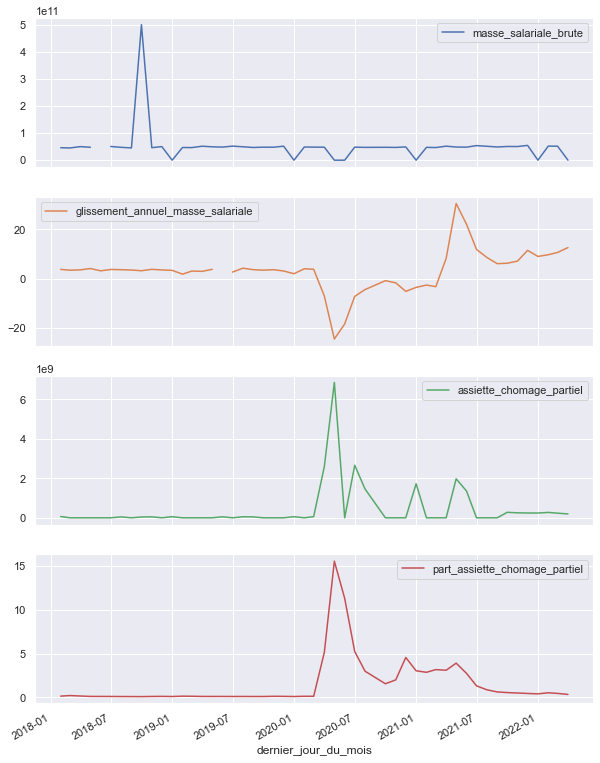

In [100]:
df.plot(subplots=True, figsize=(10, 14))
None

- We can see there is a sort of missing data somewhere, we'll handle that later in [Data Cleaning](#data_cleaning)
- Values of *masse_salariale_brute* close to zero seem wrong and should rather be around 1e10 numbers
- All graphs have one or more huge spikes, we'll see whether we should set boundaries in [Data Cleaning](#data_cleaning)
- The spikes might be the cause of such a flat portion on the left side. Fluctuations might be greater but we cannot see them since the graph scale is adapted to the large spikes values

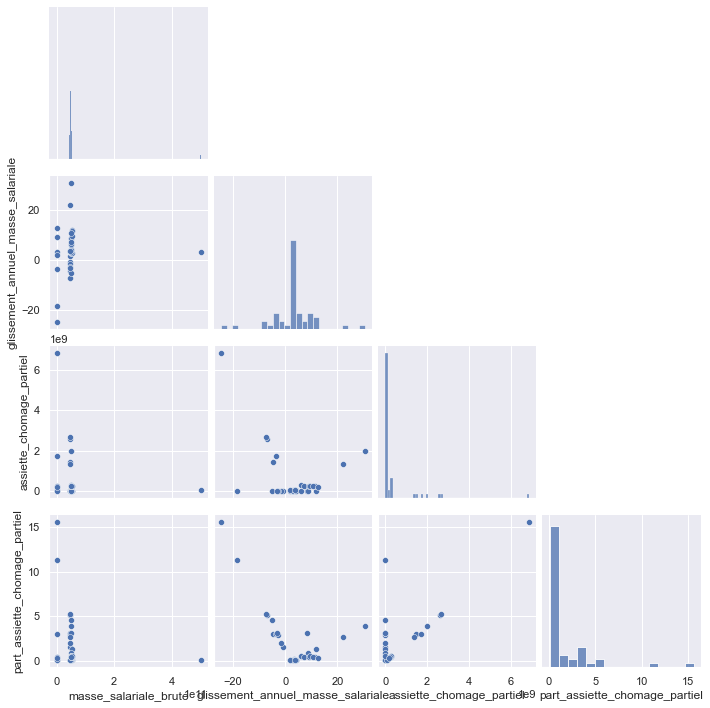

In [101]:
sns.pairplot(df, corner=True)
None

Analysis:
- *masse_salariale_brute*: the distribution is highly contracted on the left side. There might be an extremely positive outlier
- Similar remark for *assiette_chomage_partiel*
- *glissement_annuel_masse_salariale* might be the variable closest to a normal law (but still far) - logical since the name suggests it has been computed as the evolution (often close to a normal law - see returns in finance, compared to their raw prices)
- *part_assiette_chomage_partiel* and *assiette_chomage_partiel* seem to be:
    - uncorrelated when the later is at 0
    - positively correlated when the later is above 0 (when one grows, the other grows too)
    - in the later case the relation seems linear
- *part_assiette_chomage_partiel* with *glissement_annuel_masse_salariale* seem to be:
    - negatively correlated when the later is below 0 (diagonal from bottom left to upper right corner)
    - positively correlated otherwise (diagonal from botton right to upper left corner)
    - the relations seem linear if we consider above and below 0 separately

Theory:
- There would be no relation between two variables if their pairplot would display a kind of round cloud. As soon as lines appear, it is the sign a correlation.
- Remember that correlations are useful since they can represent pattern in the data that may help take decisions or make predictions.

### Correlations
Pearson (good for qunatitative variables linked linearly)

Theory:
- Be careful as many tools in data science can yield results even though the necessary conditions to interpret these results are not met:
    - it is not enough to obtain a correlation
    - the correlation should be computed properly (features respecting certain assumptions)
    - it should also be statistically robust (not seen in this notebook, it is about sampling error and assessment through statistical tests)

<AxesSubplot:>

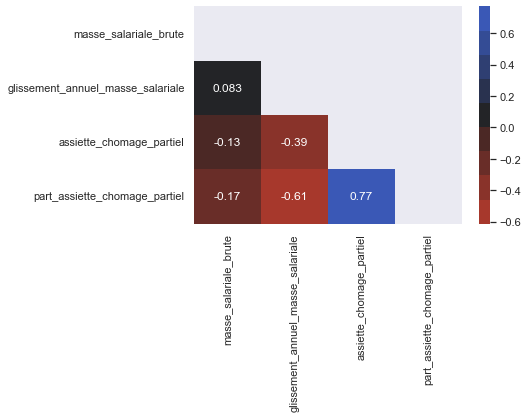

In [102]:
colormap = sns.diverging_palette(15, 260, s=75, l=40, n=9, center="dark")
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap=colormap, annot=True, mask=mask)

Analysis:
- All the features but *masses_salariale_brute* are highly correlated
- Thus, many information is redundant, only a single variable between *glissement_annuel_masse_salariale* and *assiette_chomage_partiel* should be preserved (*part_assiette_chomage_partiel* is preserved in any case since it is the target variable).
- Since *glissement_annuel_masse_salariale* is the most correlated with the target, it is the variable that contains the most interesting information for our problem. Hence will be kept while others (*assiette_chomage_partiel*) will be deleted (in [Data Management](#data_management) section).
- Furthermore, *assiette_chomage_partiel*, as the name suggests, might come from the same phenomenom than the target *part_assiette_chomage_partiel*, thus should be discarded to prevent data leakage.
- However, it is still possible to use this kind of variable in a Time Series problem, by using the lagged variable (using old values)

To go further:
- Use statistical tests to check the robustness of these results.

Theory:
- They correlations indicated might otherwise be due to a sampling bias:
    - ask two neighbors if they like chocolate
    - If both don't, it does mean that people **in your sample test** don't like chocolate
    - It does not mean that people in your country do not like chocolate
    - The sample should be **representative** of the majority to enable the extrapolation of a result

## Data Cleaning<a id='data_cleaning'></a>

### Check missing values

Find the missing date
- We have seen in the first plots that a data point is missing
- Let's find which date is missing
- Then impute the missing date (through linear interpolation)
- Impute also the values of its (missing) row

In [103]:
# Check number of occurences for each year
df.index.year.value_counts().sort_index()

2018    12
2019    12
2020    11
2021    12
2022     3
Name: dernier_jour_du_mois, dtype: int64

We can see the missing date is somewhere in 2020

In [104]:
# Find the missing date in 2020
mask_2020 = df.index.year == 2020
# A bit tricky to write this way, but appreciate how this (almost) reads as a simple english sentence
[month for month in range(1, 13) if not month in df[mask_2020].index.month]

[8]

- The missing date is thus 2020-08-31 (from a calendar one can check there are 31 days in august)
- Will have to reconstruct using interpolation (mean between previous and next rows)
- It will be possible since these time series seem linear (does not mean a straight line)

In [105]:
# Interpolate the missing row
# (appreciate how defining variables helps understanding,
# even though the code would work equally by writting 
# everything on a single line)
next_date_row = df.loc['2020-09-30']
prev_date_row = df.loc['2020-07-31']

# Compute interpolated values for all the variables of the missing row
interpolate_2020_08 = ((next_date_row + prev_date_row) / 2)

# Transform the result as a DataFrame object
interpolate_2020_08 = pd.DataFrame(
    data=[interpolate_2020_08.values],
    columns=interpolate_2020_08.index,
    index=['2020-08-31'],
)

# Cast as datetime
interpolate_2020_08.index = pd.to_datetime(interpolate_2020_08.index)

# Add the missing date to the index (at the end)
df = pd.concat([df, interpolate_2020_08])

# Re-sort the index
df.sort_index(inplace=True)

In [106]:
# Check the right execution of intended imputation
df.loc[['2020-09-30', '2020-08-31', '2020-07-31']]

,masse_salariale_brute,glissement_annuel_masse_salariale,assiette_chomage_partiel,part_assiette_chomage_partiel
2020-09-30,4.761950e+10,-0.870150,0.000000e+00,1.557461
2020-08-31,4.744790e+10,-2.690735,7.286845e+08,2.273969
2020-07-31,4.727629e+10,-4.511321,1.457369e+09,2.990477


### Check for NAs

In [107]:
df.isna().sum()

masse_salariale_brute                1
glissement_annuel_masse_salariale    1
assiette_chomage_partiel             0
part_assiette_chomage_partiel        0
dtype: int64

There are two missing values:
- 1 in *masse_salariale_brute*
- 1 in *glissement_annuel_masse_salariale*

Since:
- there is a single NaN in the two columns
- the values seem to have a linear relation in each variable
- use the simple imputation bfill

In [108]:
# Imputation NaNs:
# - Use bfill as it prevents the risk of data leakage (using future values for imputation of past values)
df.fillna(method='bfill', inplace=True)

To go further:
- The other variables can be used to impute the missing values using a linear or non-linear imputer

### Detect outliers

#### Automatic outliers detection

- In a times series problem, it is not possible to delete an entire row, we need each date
- (It is not the case when we have a record of transactions that have no link between each other)
- Let's replace the detected outliers by the expected min / max (boundaries)

To go further:
- You can spend more time to assess more precisely which values should be kept

In [109]:
# Create a function to automate this systematic work
def get_outliers(df, feature, margin=1.5, method='iqr', replace=False, verbose=True):
    """
    Detect outliers using either the IQR (interquartile range) method
    Less sensible to very large outliers, or the standard deviation method

    args:
        method: iqr (default) or std
    """
    # Define boundaries
    df_feat = df[feature]

    if method=='iqr':
        iqr = df_feat.quantile(.75) - df_feat.quantile(.25)
        bound_max = df_feat.median() + iqr * margin
        bound_min = df_feat.median() - iqr * margin
    elif method=='std':
        bound_max = df_feat.mean() + df_feat.std() * margin
        bound_min = df_feat.mean() - df_feat.std() * margin
    else:
        raise NameError

    # Detect outliers with masks
    is_above = df_feat > bound_max
    is_below = df_feat < bound_min
    mask_outliers_array = is_above | is_below
    
    # Extract outliers
    outliers = df[mask_outliers_array]

    # Replace by corresponding min, max value
    if replace:
        df.loc[is_below, feature] = bound_min
        df.loc[is_above, feature] = bound_max

    if verbose:
        print(f'min bound: {bound_min}')
        print(f'max bound: {bound_max}')
        print(f'Outliers :\n'
              f'{outliers[feature]}\n')

    return outliers, bound_min, bound_max

Replace outliers by their corresponding boundary value

In [110]:
for feature in df:
    get_outliers(df, feature, replace=True)

min bound: 42463817242.0
max bound: 53728048180.0
Outliers :
2018-09-30    5.000000e+11
2018-12-31    4.600000e+00
2019-12-31    4.600000e+00
2020-04-30    4.600000e+00
2020-05-31    4.600000e+00
2020-12-31    4.600000e+00
2021-06-30    5.381706e+10
2021-11-30    5.457379e+10
2021-12-31    4.600000e+00
2022-03-31    4.600000e+00
Name: masse_salariale_brute, dtype: float64

min bound: -1.4083485245
max bound: 8.3871584059
Outliers :
2020-03-31    -7.157234
2020-04-30   -24.649473
2020-05-31   -18.501244
2020-06-30    -7.287336
2020-07-31    -4.511321
2020-08-31    -2.690735
2020-10-31    -1.773326
2020-11-30    -5.242580
2020-12-31    -3.618969
2021-01-31    -2.672570
2021-02-28    -3.318223
2021-04-30    30.548969
2021-05-31    22.097902
2021-06-30    11.846802
2021-07-31     8.579352
2021-11-30    11.471635
2021-12-31     8.992572
2022-01-31     9.679403
2022-02-28    10.624362
2022-03-31    12.603487
Name: glissement_annuel_masse_salariale, dtype: float64

min bound: -357726793.5
max

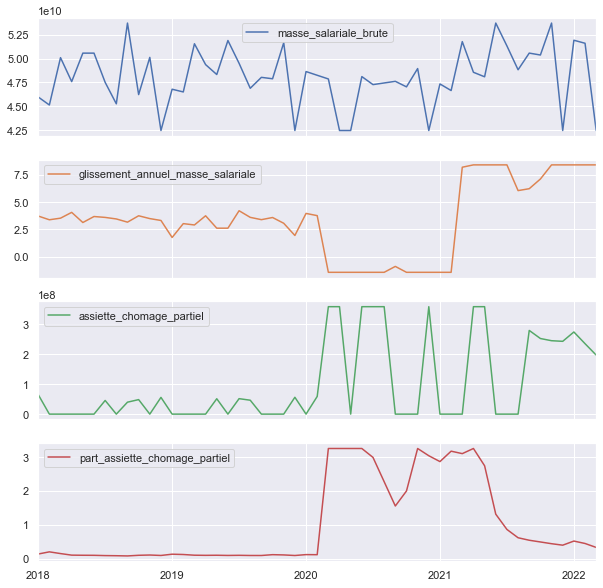

In [111]:
# Check features deformation via graphs
df.plot(subplots=True, figsize=(10, 10))
None

- See how the range between min and max values in the plot are way smaller than the previous plot.
- For example *masse_salariale_brute*:
    - previously: [0, 5e11]
    - currently: [4.25e10, 5.25e10]
- Thus, more fluctuations are now perceptible (mostly for *masse_salariale_brute*)
- Depending on the project you would whether be incentized to delete the outliers or you would have to keep them

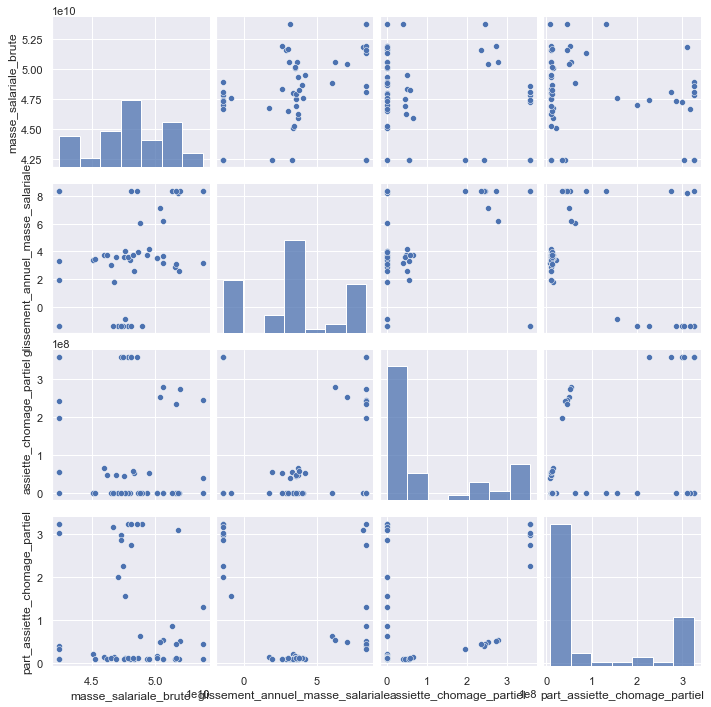

In [112]:
sns.pairplot(df)
None

- Appreciate how the distributions (diagonal) are more readable
- Indeed features are less contracted to the left
- Patterns start to be visible
- However, the relations do not seem linear! (it does not seem like a straight line or a curve)
- Thus, we might need non-linear models: random forest (XGBoost), Knn, RNN, LSTM, etc. (not done in this introductory notebook)

<AxesSubplot:>

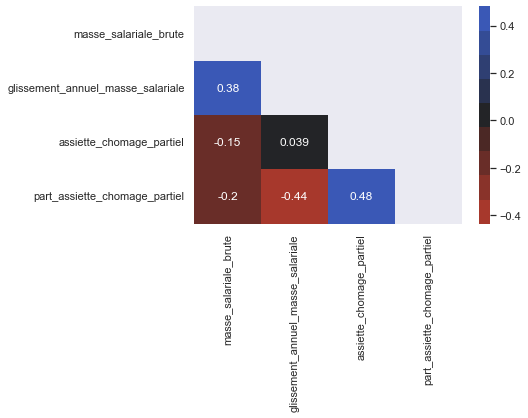

In [113]:
# See impact on correlations
colormap = sns.diverging_palette(15, 260, s=75, l=40, n=9, center="dark")
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap=colormap, annot=True, mask=mask)

- A correlation is now perceptible between the features *masse_salariale_brute* and *glissement_annuel_masse_salariale*
- Some correlations decreased:
    - *assiette_chomage_partiel* and *glissement_annuel_masse_salariale*: before -39%, now ±0%
    - *part_assiette_chomage_partiel* and *assiette_chomage_partiel*: before 77%, now 48%
- The correlations are less extreme and better distributed, which could suggest that deleting the outliers enabled to catch better patterns. This will most likely help the model.
- It was before like an over-suggy cake (outliers), now, more subtle tastes are perceptible.

To go further:
- The boundaries should be computed on the train set only, at the risk of data leakage otherwise
- This has been done on the whole dataset for simplification

### Check wrong values

In [114]:
df['assiette_chomage_partiel'].value_counts().head(4)

0.0            26
357726793.5     8
65170920.0      1
58840531.0      1
Name: assiette_chomage_partiel, dtype: int64

- Half the values are zeros. Drop this variable.
- Also, as the name suggests it comes from the same phenomenon than the target:
    - which would result in a data leakage
    - hence leading to impossible predictions on out-of-sample
    - a possibility would be to use its lagged values
    - but it would probablly be equivalent to using the target lagged values as complementary feature

In [115]:
# Delete poor variable
df.drop(columns='assiette_chomage_partiel', inplace=True)

## Data Management<a id='data_management'></a>

### Drop features

Theory:
- The more correlated with the target the better:
    - since we keep the target variable (by construction to reach the project objective)
    - and we expect other variables to be greatly correlated with it as it will help predict the target
- The less correlated the features the better (between them - named multicolinearity):
    - Drop groups of features that are excessively correlated (>30% | 50%), keep only one feature in the group
    - Keep the features that contain the most information

In practice:
- *part_assiette_chomage_partiel* is our target variable. We keep it.
- *glissement_annuel_masse_salariale* with our target *part_assiette_chomage_partiel* have interesting correlations (large) (-44%)
- *glissement_annuel_masse_salariale* and *masse_salariale_brute* have a multicolinearity of 38%:
    - We could delete one of the variables: in this case delete *masse_salariale_brute* as it is less correlated with the target (-20%) than *glissement_annuel_masse_salariale* (-44%)
    - Important multicolinearity is risky and prone to less robust and less interpretable models

In [116]:
# Drop the multicolinear variable 'masse_salariale_brute'
df.drop(columns='masse_salariale_brute', inplace=True)

In [117]:
df.head()

,glissement_annuel_masse_salariale,part_assiette_chomage_partiel
2018-01-31,3.723658,0.141543
2018-02-28,3.382396,0.205704
2018-03-31,3.528660,0.154912
2018-04-30,4.056714,0.108859
2018-05-31,3.132336,0.105381


## Feature Engineering<a class=anchor id=feature_engineering></a>
The main goal of feature engineering is to help the model see patterns in the data (it is not as smart as you might expect)

Let's create feature is_year_end:
- 1 when month is november or december
- 0 otherwise

In [118]:
mask_nov_dec = (df.index.month == 11) | (df.index.month == 12)
df['is_year_end'] = mask_nov_dec.astype(int)

In [119]:
# Check it was correctly applied
df.iloc[7:14]

,glissement_annuel_masse_salariale,part_assiette_chomage_partiel,is_year_end
2018-08-31,3.456928,0.091683,0
2018-09-30,3.164464,0.085523,0
2018-10-31,3.747040,0.104400,0
2018-11-30,3.489405,0.112381,1
2018-12-31,3.319051,0.099413,1
2019-01-31,1.768492,0.136573,0
2019-02-28,3.031088,0.127574,0


### Normalize variables

In [120]:
df = (df - df.mean())/df.std()

## Prediction<a class=anchor id=prediction></a>
- Regression
- Time Series
- Predict the future

### Prepare data for time series prediction
- split train and test (70% train, 30% test)
- extract features (X) and target (y)
- shift features (this enables to find the link between old features values and current target values)

In [121]:
# Train / Test Split
PCT_TRAIN = .60

last_train = int(df.shape[0] * PCT_TRAIN)
train = df.iloc[:last_train]
test = df.iloc[last_train:]

# For the plot only
train_index = train.index
test_index = test.index

In [122]:
# Features vs Target (and shift)
TARGET = 'part_assiette_chomage_partiel'
N_DELAY = 1  # months to predict ahead

X_train = train.shift(N_DELAY)  # use data n months before to predict today
X_train = X_train.iloc[N_DELAY:]
y_train = train[TARGET].iloc[N_DELAY:]
train_index = train_index[N_DELAY:]  # For the plot only

X_test = test.shift(N_DELAY)
X_test = X_test.iloc[N_DELAY:]
y_test = test[TARGET].iloc[N_DELAY:]
test_index = test_index[N_DELAY:]  # For the plot only

### Model
- Train
- Evaluate (test)
- Predict

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [124]:
# Make a pipeline to automate transformation of the input
# On both train and test sets
MODEL = 'ridge'  # lr, ridge
USE_POLY_FEATS = False  # True, False
DEGREE = 2

if MODEL == 'lr':
    model = LinearRegression()
elif MODEL == 'ridge':
    model = Ridge(alpha=1)

if USE_POLY_FEATS:
    poly = PolynomialFeatures(DEGREE, include_bias=False)  # bias is handled next by LinearRegression
    pipeline = Pipeline(steps=[('t', poly), ('m', model)])
else:
    pipeline = Pipeline(steps=[('m', model)])

In [125]:
# Train model
poly_reg_model = pipeline.fit(X_train, y_train)

# Evaluate model on train (predict on the train set)
y_train_pred = poly_reg_model.predict(X_train)
print(f'Train R^2: {poly_reg_model.score(X_train, y_train):.2f}')

# Evaluate model on test (predict on the test set)
y_test_pred = poly_reg_model.predict(X_test)
print(f'Test R^2: {poly_reg_model.score(X_test, y_test):.2f}')

Train R^2: 0.72
Test R^2: 0.84


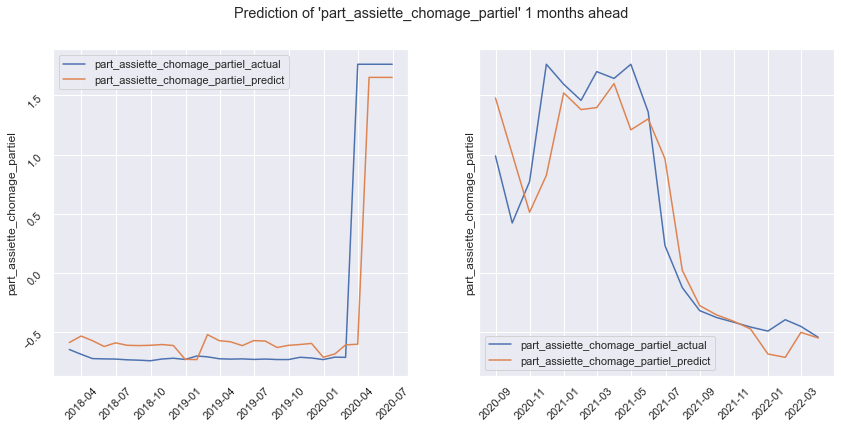

In [126]:
# Define figure (whole white frame and space for each plot)
fig, ax = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Left plot (train)
ax[0].plot(train_index, y_train)
ax[0].plot(train_index, y_train_pred)
ax[0].tick_params(labelrotation=45)
ax[0].legend([f'{TARGET}_actual', f'{TARGET}_predict'])
ax[0].set_ylabel(TARGET)

# Right plot (train)
ax[1].plot(test_index, y_test)
ax[1].plot(test_index, y_test_pred)
ax[1].tick_params(labelrotation=45)
ax[1].legend([f'{TARGET}_actual', f'{TARGET}_predict'])
ax[1].set_ylabel(TARGET)

fig.suptitle(f"Prediction of '{TARGET}' {N_DELAY} months ahead")
plt.show()

Results:
- Train R^2: 0.72
- Test R^2: 0.84

Analysis:
- The performance seems ok using this model on these data, with these settings
- The model has mostly followed the trend with a month of delay. It is not very interesting.
- We can see that the training set leaves very few indices on an existing pattern. It presents a straight angle that happen only once. This is too few to be learnt by a machine learning model (or any other model).
- In conclusion, we should not be satisfied even though $R^2$ is high on both the train and test sets.

Going further:
- implement a benchmark model, that strictly predicts the previous value (1 strict month of delay), see if the performance is better or worse than other models.
- try the model SARIMAX (can handle the seasonality easily)
- try the model XGBOOST
- **find complementary data (very often this is more powerful than playing with models)**
- try using the target variable also as a feature (lagged like the others)